In [1]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")

# 1. Read in data set, explore

In [2]:
# Load the processed data

df_med = pd.read_csv('../med_data1.csv')

In [3]:
df_med.head(3)

,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,fav_color,Credit_card,ReAdmin,Gender,SeniorCitizen,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,MonthlyCharge,TotalCharge,item1,item2,item3,item4,item5,item6,item7,item8
0,1,C412403,cd86e3b5-bccb-4c38-b406-a70859af6424,1b827d78c02cdf967d83280a316fbab7,19610,40.34,-75.98,Reading,PA,15439,Berks,Suburban,America/New_York,"Production assistant, radio",1,79,Regular High School Diploma,Student,83147.66,Divorced,Snow,Discover,No,Female,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.59,95.02,1034.38,0,1,0,4,1,2,2,4
1,2,Z919181,7058d104-99d4-41ae-ad17-def063f2024c,e3d31d932fe4468908664f2b054fa31c,66080,38.40,-95.26,Richmond,KS,922,Franklin,Urban,America/Chicago,Retail buyer,2,31,"Some College, 1 or More Years, No Degree",Full Time,54612.56,Divorced,PaleGoldenRod,Mastercard,Yes,Male,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.13,97.44,1497.76,3,4,3,3,2,4,1,3
2,3,F995323,4c1a465a-2a2b-4f38-bbe6-036fac234eaa,2644b097b08b5548313266f100a6e22c,45653,38.89,-82.82,Minford,OH,3782,Scioto,Urban,America/New_York,Forensic scientist,7,49,"Some College, 1 or More Years, No Degree",Student,7726.42,Married,WhiteSmoke,VISA 16 digit,Yes,Male,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.77,82.50,395.13,3,1,2,3,2,2,3,4


In [4]:
#df_med.describe()
#df_med.dtypes

In [4]:
# Define features and target variables

X = df_med.drop('TotalCharge',axis=1)   #Feature Matrix
Y = df_med['TotalCharge']          #Target Variable

# Print dimensions
print(X.shape)
print(Y.shape)

(10000, 49)
(10000,)


# 2. Feature Engineering

## Variable transformation 

count   10000.00
mean     3186.53
std      2455.03
min       -23.34
25%       727.69
50%      3119.10
75%      5572.63
max      8086.88
Name: TotalCharge, dtype: float64


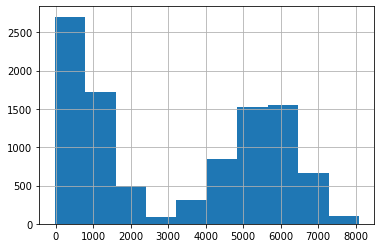

In [5]:
# Summary of Y variable

print(Y.describe())
Y.hist()

In [6]:
# transform zip to categorical

X['zip']= X['zip'].astype('str')

## Variable selection

### Continuous variables

In [7]:
# Cont cols (normalize for KNN)

# Continuous cols (normalize-for KNN)
cols_cont = ['Population', 'Children', 'Lat', 'Lng', 'Income', 'Age', 'Initial_Days', 'MonthlyCharge']
X_cont = X[cols_cont]
X_cont.head(3)

,Population,Children,Lat,Lng,Income,Age,Initial_Days,MonthlyCharge
0,15439,1,40.34,-75.98,83147.66,79,10.59,95.02
1,922,2,38.40,-95.26,54612.56,31,15.13,97.44
2,3782,7,38.89,-82.82,7726.42,49,4.77,82.50


### Categorical variables

In [8]:
# Cat cols-full list

cols_cat_all = X.loc[:, X.dtypes == np.object].columns.values.tolist() #have to translate back to list format
cols_cat_all = cols_cat_all[3:] #remove the first three cols, related to cust ID


In [9]:
# Cat cols-only those with limited tot unique value (otherwise too many categories created for dummies)

t = X[cols_cat_all].nunique().sort_values(ascending=False)
t = t.loc[lambda t: t < 20]  # change value to what is desired here, from 20
cols_cat_all_red = t.index.values.tolist()
X[cols_cat_all_red].nunique().to_frame('tot unique') #updated reduced list 


,tot unique
Education,12
Credit_card,10
Employment,5
Marital,5
Services,4
Area,3
Complication_Risk,3
Initial_Admin,3
HighBlood,2
Hyperlipidemia,2


In [10]:
# 1. Create dummies-for categorical cols (use reduced col list)

X_cat = pd.get_dummies(X[cols_cat_all_red], drop_first=True) # drop first as it is redundant
print('number of cat cols chosen: ', X[cols_cat_all_red].shape[1])
print('total cat cols after one hot encoding: ', X_cat.shape[1])
X_cat.head(3)

number of cat cols chosen:  22
total cat cols after one hot encoding:  51


,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Area_Suburban,Area_Urban,Complication_Risk_Low,Complication_Risk_Medium,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,HighBlood_Yes,Hyperlipidemia_Yes,Reflux_esophagitis_Yes,Allergic_rhinitis_Yes,Anxiety_Yes,BackPain_Yes,Arthritis_Yes,Diabetes_Yes,Overweight_Yes,Stroke_Yes,ReAdmin_Yes,Gender_Male,Asthma_Yes,SeniorCitizen_Yes
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0


In [11]:
# Join Cat and Noncat together

X_all = pd.concat([X_cont, X_cat],axis=1)

print('total cols for final df: ', X_all.shape[1]) 
X_all.head()

total cols for final df:  59


,Population,Children,Lat,Lng,Income,Age,Initial_Days,MonthlyCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Area_Suburban,Area_Urban,Complication_Risk_Low,Complication_Risk_Medium,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,HighBlood_Yes,Hyperlipidemia_Yes,Reflux_esophagitis_Yes,Allergic_rhinitis_Yes,Anxiety_Yes,BackPain_Yes,Arthritis_Yes,Diabetes_Yes,Overweight_Yes,Stroke_Yes,ReAdmin_Yes,Gender_Male,Asthma_Yes,SeniorCitizen_Yes
0,15439,1,40.34,-75.98,83147.66,79,10.59,95.02,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,1,0
1,922,2,38.40,-95.26,54612.56,31,15.13,97.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0
2,3782,7,38.89,-82.82,7726.42,49,4.77,82.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0
3,1115,0,39.89,-90.40,57779.93,31,1.71,87.47,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,17445,0,40.64,-103.23,70179.69,50,1.25,87.46,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1


# Train/Test Split Data

In [12]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, Y,
    test_size=0.3,
    random_state=1
)

In [13]:
# Print dimensions

print('Train cols: ', X_train.shape[1])
print('Test cols: ', X_test.shape[1])

Train cols:  59
Test cols:  59


# Predictive Modeling Techniques

# 1. KNN

This section covers KNN

In [14]:
# Load the K-Nearest Neighbors class
from sklearn.neighbors import KNeighborsRegressor

# Load the metrics libraries
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Scale the data for cols_cont 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #MinMaxScaler()

X_train_std = X_train.copy() #copy train features df for KNN
X_test_std = X_test.copy()  #copy test features df for KNN
X_train_std[cols_cont] = scaler.fit_transform(X_train_std[cols_cont]) 
X_test_std[cols_cont] = scaler.transform(X_test_std[cols_cont])

X_train_std.head(3)

,Population,Children,Lat,Lng,Income,Age,Initial_Days,MonthlyCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_CT Scan,Services_Intravenous,Services_MRI,Area_Suburban,Area_Urban,Complication_Risk_Low,Complication_Risk_Medium,Initial_Admin_Emergency Admission,Initial_Admin_Observation Admission,HighBlood_Yes,Hyperlipidemia_Yes,Reflux_esophagitis_Yes,Allergic_rhinitis_Yes,Anxiety_Yes,BackPain_Yes,Arthritis_Yes,Diabetes_Yes,Overweight_Yes,Stroke_Yes,ReAdmin_Yes,Gender_Male,Asthma_Yes,SeniorCitizen_Yes
2228,-0.07,1.32,-0.91,-0.20,-1.19,1.09,-1.01,-0.01,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1
5910,0.82,0.40,-0.46,-1.63,-0.56,1.24,1.12,-0.35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,1,0,0
1950,-0.57,0.40,0.45,0.12,-0.86,1.19,-0.91,-0.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1


In [16]:
# Train a K-Nearest Neighbors model

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_std, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [17]:
# Print overall test-set accuracy, precision, recall
y_pred = knn.predict(X_test_std)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('KNN RMSE value is:', error)
print('KNN R2:', r2_score(y_test, y_pred))

KNN RMSE value is: 660.358118065605
KNN R2: 0.9268160624821276


# 2. Decision Tree

This section covers Decision Trees

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Train a Random Forest

tree = DecisionTreeRegressor(max_depth=5)

tree.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
# Print overall test-set accuracy, precision, recall
y_pred = tree.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('DT RMSE value is:', error)
print('DT R2:', r2_score(y_test, y_pred))

DT RMSE value is: 188.94527548086646
DT R2: 0.9940085932583619


# 3. Random Forest 

This section covers Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Train a Random Forest

forest = RandomForestRegressor(
    n_estimators=100,
    max_features=15,
    max_depth=12,
    random_state=1,
)
forest.fit(X_train, y_train) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [23]:
# Print overall test-set accuracy, precision, recall
y_pred = forest.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('RF RMSE value is:', error)
print('RF R2:', r2_score(y_test, y_pred))

RF RMSE value is: 274.9912724108322
RF R2: 0.987309037791129


## Feature Importance for Random Forest

In [24]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

Initial_Days               0.90
ReAdmin_Yes                0.04
MonthlyCharge              0.02
Income                     0.01
Population                 0.01
Lat                        0.01
Lng                        0.00
Age                        0.00
Complication_Risk_Medium   0.00
Children                   0.00
dtype: float64

No handles with labels found to put in legend.


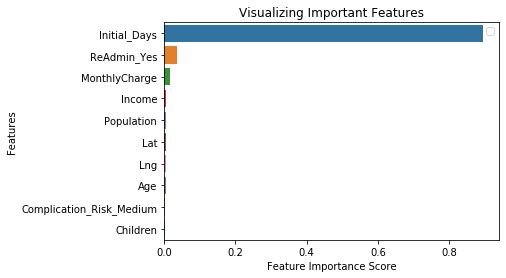

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# 4. Advanced Regression

This section covers Ridge and Lasso Regression

In [26]:
from sklearn.linear_model import Ridge, Lasso, LassoCV

## Ridge

In [27]:
# Train Ridge model

ridge = Ridge(alpha=.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# Print overall test-set accuracy, precision, recall
y_pred = ridge.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('Ridge RMSE value is:', error)
print('Ridge R2:', r2_score(y_test, y_pred))

Ridge RMSE value is: 194.08952451173798
Ridge R2: 0.9936779063917175


## Lasso

In [29]:
# Train Lasso model

lasso = Lasso(alpha=485.824775)
lasso.fit(X_train, y_train)

Lasso(alpha=485.824775, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
# Print overall test-set accuracy, precision, recall
y_pred = lasso.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print('Lasso RMSE value is:', error)
print('Lasso R2:', r2_score(y_test, y_pred))

Lasso RMSE value is: 205.28357509805772
Lasso R2: 0.9929276273692572


### Lasso with CV (extra)

In [51]:
lasso = LassoCV()
lasso.fit(X_train, y_train_log)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X_train, y_train_log))
coef = pd.Series(lasso.coef_, index = X_train1.columns)

Best alpha using built-in LassoCV: 0.567552
Best score using built-in LassoCV: 0.863228


In [53]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 55 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

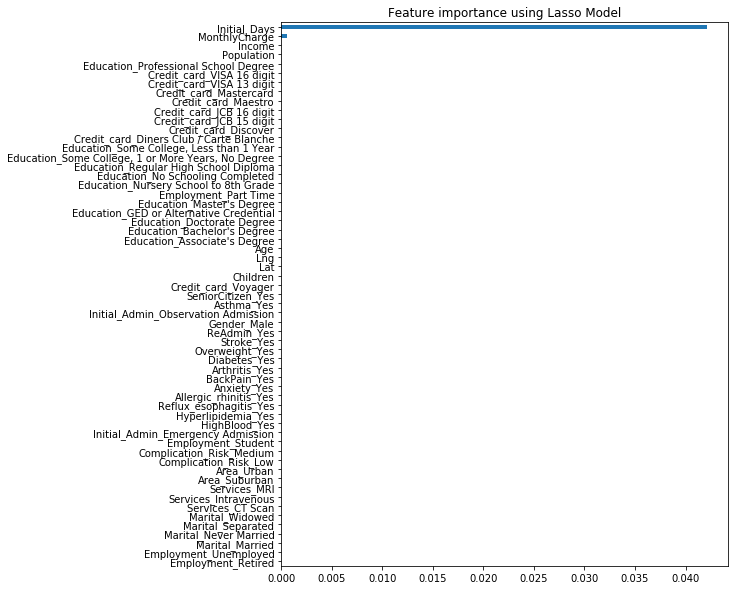

In [54]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Linear reg

In [43]:
# Train linear reg model 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Print overall test-set accuracy, precision, recall
y_pred = linear.predict(X_test1)
error = np.sqrt(mean_squared_error(y_test_log1,y_pred)) #calculate rmse
print('LR RMSE value is:', error)
print('LR R2:', r2_score(y_test_log1, y_pred)) 

LR RMSE value is: 0.4681468526307122
LR R2: 0.8536305900104298


In [60]:
t1 = []
t2 = []
for (columnName, columnData) in X_train.iteritems():
    t1.append(columnName)
    t2.append(columnData.corr(y_train_log))
    
df = pd.DataFrame({'X_train col': t1, 'Correlation': t2})

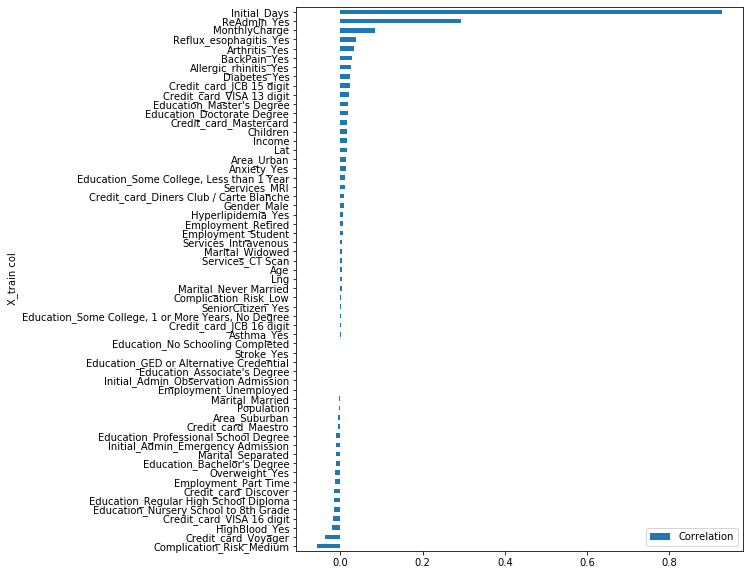

In [61]:
df.sort_values('Correlation',ascending=False)
df.sort_values('Correlation').plot.barh(x='X_train col', y='Correlation')

In [90]:
X_train.sample(3)

,Population,Children,Lat,Lng,Income,Age,Tenure,MonthlyCharge,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate Degree,Education_GED or Alternative Credential,Education_Master's Degree,Education_No Schooling Completed,Education_Nursery School to 8th Grade,Education_Professional School Degree,Education_Regular High School Diploma,"Education_Some College, 1 or More Years, No Degree","Education_Some College, Less than 1 Year",Credit_card_Diners Club / Carte Blanche,Credit_card_Discover,Credit_card_JCB 15 digit,Credit_card_JCB 16 digit,Credit_card_Maestro,Credit_card_Mastercard,Credit_card_VISA 13 digit,Credit_card_VISA 16 digit,Credit_card_Voyager,Employment_Part Time,Employment_Retired,Employment_Student,Employment_Unemployed,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Area_Suburban,Area_Urban,InternetService_Fiber Optic,InternetService_None,Contract_One year,Contract_Two Year,Partner_Yes,OnlineBackup_Yes,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,Multiple_Yes,OnlineSecurity_Yes,Phone_Yes,Depend_Yes,Churn_Yes,Gender_Male,PaperlessBilling_Yes,SeniorCitizen_Yes
2366,41665,0,33.81592,-84.55204,23913.39,60,1.582585,104.969934,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0
683,1535,1,33.54826,-90.52479,7056.15,58,7.847288,82.484375,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3162,12824,3,39.90362,-75.29342,29721.03,55,1.481645,87.480560,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0


In [31]:
y_train_log = np.log(y_train) 
y_test_log = np.log(y_test) 

In [32]:
y_train

2228    701.69
5910   5777.43
1950    922.59
2119    460.17
5947   6034.95
         ...  
2895    610.08
7813   7455.82
905     794.35
5192   5832.68
235     515.63
Name: TotalCharge, Length: 7000, dtype: float64

In [33]:
y_train_log

2228   6.55
5910   8.66
1950   6.83
2119   6.13
5947   8.71
       ... 
2895   6.41
7813   8.92
905    6.68
5192   8.67
235    6.25
Name: TotalCharge, Length: 7000, dtype: float64

In [34]:
y_train_log[y_train_log.isnull()]

Series([], Name: TotalCharge, dtype: float64)

In [47]:
y_test_log[y_test_log.isnull()]

2461   nan
Name: TotalCharge, dtype: float64

In [49]:
y_test_log1 = y_test_log.drop(2461)

In [50]:
y_test_log1.shape

(2999,)

In [57]:
X_test1 = X_test.drop(2461)